In [2]:
# bibliotecas para realizar o exercicio
import numpy as np # biblioteca numpy  criar arrays numpy
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  # biblioteca que permite aplicar o algoritmo Kmeans para agrupamento dos dados
from mpl_toolkits.mplot3d import Axes3D #biblioteca que permite a plotagem de gráficos em 3d

In [6]:
# criar a base de dados

dados = pd.DataFrame({'Símbolo':["AAPL","Google","AMZN","MSFT","TSLA","FB"],
                      'Preço':[150.12,2700.45,300.89,3200.10,700.78,350.40],
                      'Volume de negociação':[3000000,1000000, 2500000,  1200000,5000000,900000 ],
                       'Capitalização de mercado':[2000000000000, 1800000000000,2200000000000 ,1700000000000,750000000000 , 
                                900000000000]
                      })

In [5]:
dados

,Símbolo,Preço,Volume de negociação,Capitalização de mercado
0,AAPL,150.12,3000000,2000000000000
1,Google,2700.45,1000000,1800000000000
2,AMZN,300.89,2500000,2200000000000
3,MSFT,3200.10,1200000,1700000000000
4,TSLA,700.78,5000000,750000000000
5,FB,350.40,900000,900000000000


<Axes: title={'center': 'Nome do ativo x Preço'}, xlabel='Símbolo', ylabel='Preço'>

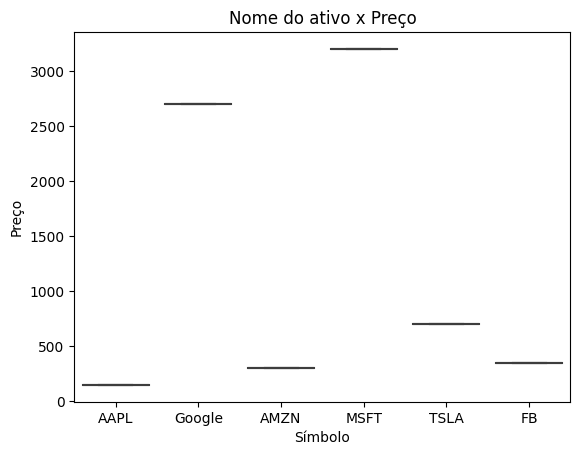

In [8]:
# plotar boxplot com a biblioteca seaborn
plt.title("Nome do ativo x Preço")
sns.boxplot(x= dados['Símbolo'],y=dados['Preço'])

In [9]:
dados_ativos = pd.get_dummies(dados,columns=['Símbolo'],drop_first=True) # Transforma variáveis categóricas em numéricas

In [10]:
dados_ativos

,Preço,Volume de negociação,Capitalização de mercado,Símbolo_AMZN,Símbolo_FB,Símbolo_Google,Símbolo_MSFT,Símbolo_TSLA
0,150.12,3000000,2000000000000,False,False,False,False,False
1,2700.45,1000000,1800000000000,False,False,True,False,False
2,300.89,2500000,2200000000000,True,False,False,False,False
3,3200.10,1200000,1700000000000,False,False,False,True,False
4,700.78,5000000,750000000000,False,False,False,False,True
5,350.40,900000,900000000000,False,True,False,False,False


In [28]:
# aplicando algoritmo kmeans
kmeans = KMeans(n_clusters=3) 
kmeans.fit(dados_ativos) # aplicando o algoritmo kmeans

C:\Users\dsadm\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [29]:
# criando métrica do Kmeans
sse = kmeans.inertia_
print(sse)

3.6250000008549994e+22


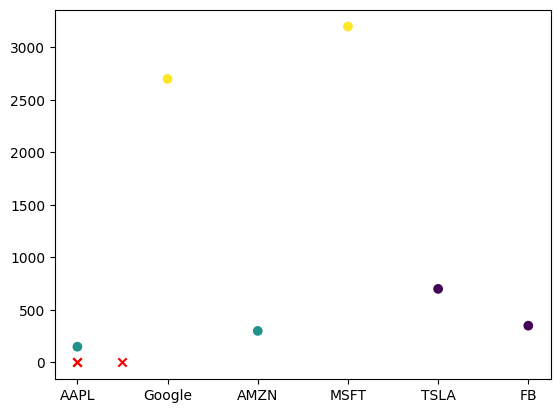

In [30]:
# criando rótulos para o agrupamento
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

#visualizando os agrupamentos - plotando gráficos
plt.scatter(dados['Símbolo'],dados['Preço'],c =labels) # plotando gráficos com os pontos
plt.scatter(centroids[:,4],centroids[:,4],marker='x',color='red')



In [31]:
#análise dos grupos restantes
dados_ativos['Grupo'] = labels
grouped_data = dados_ativos.groupby('Grupo').mean() # agrupa os valores restantes calculando a média
print(grouped_data)

          Preço  Volume de negociação  Capitalização de mercado  Símbolo_AMZN  \
Grupo                                                                           
0       525.590             2950000.0              8.250000e+11           0.0   
1       225.505             2750000.0              2.100000e+12           0.5   
2      2950.275             1100000.0              1.750000e+12           0.0   

       Símbolo_FB  Símbolo_Google  Símbolo_MSFT  Símbolo_TSLA  
Grupo                                                          
0             0.5             0.0           0.0           0.5  
1             0.0             0.0           0.0           0.0  
2             0.0             0.5           0.5           0.0  


Text(0.5, 0, 'Capitalização de mercado')

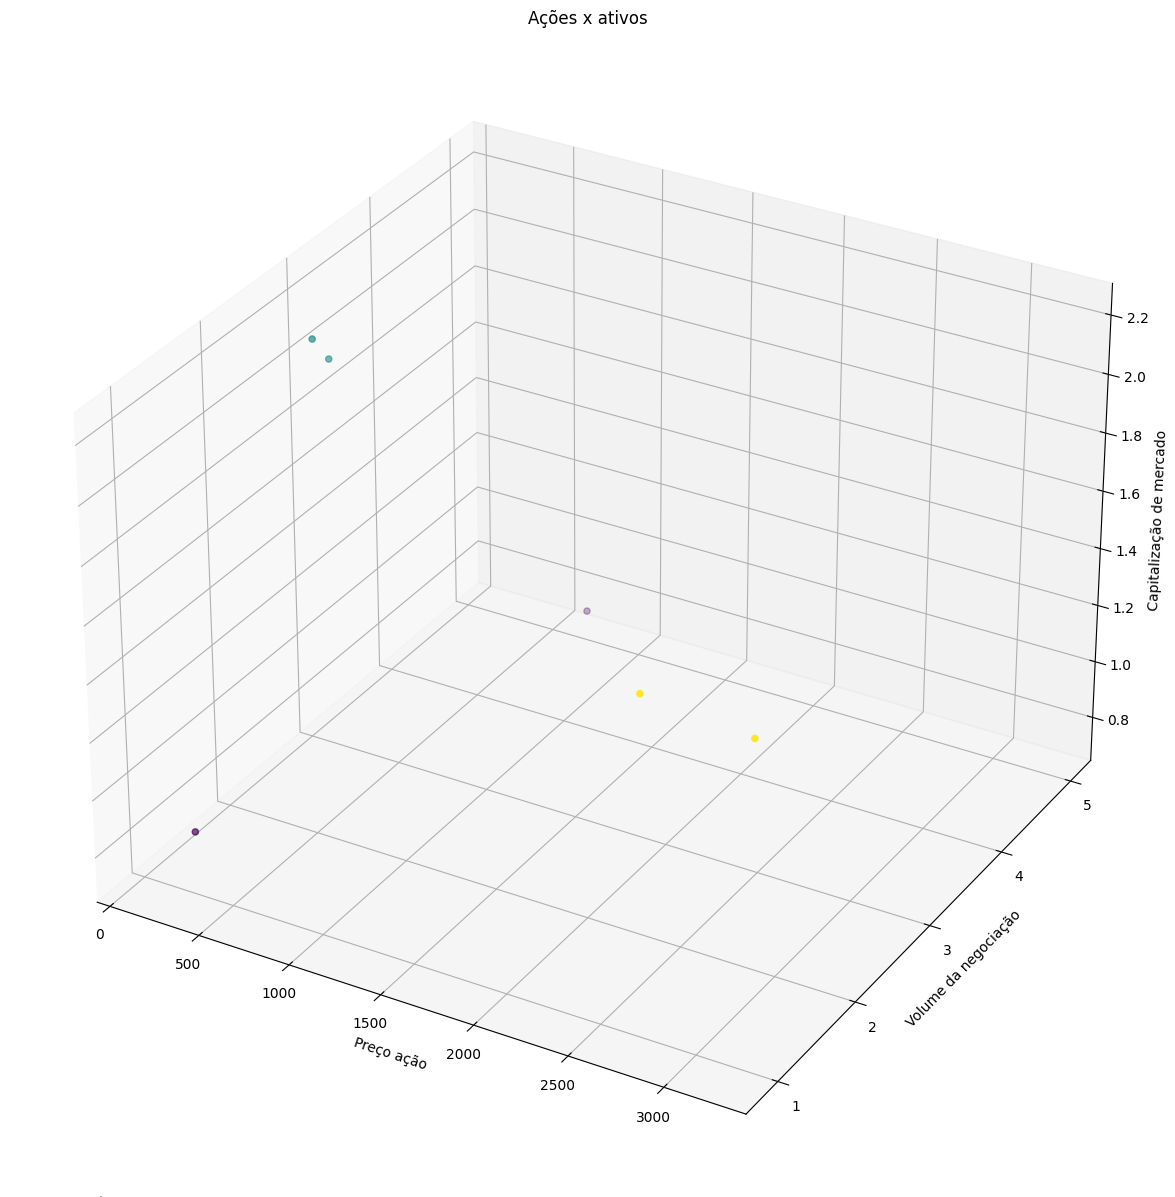

In [35]:
# Criando gráfico 3d
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(dados['Preço'],dados['Volume de negociação'],dados['Capitalização de mercado'],c =labels)
ax.set_title("Ações x ativos")
ax.set_xlabel("Preço ação")
ax.set_ylabel("Volume da negociação")
ax.set_zlabel("Capitalização de mercado")